In [183]:
import pandas as pd
import numpy as np

In [262]:
review_df = pd.read_csv('beer_reviews3')

In [263]:
review_df.drop('Unnamed: 0', axis=1, inplace=True)

In [264]:
review_df

,userid,user_location,beer_name,beer_url,beer_style,beer_substyle,overall_rating,abv,look,smell,taste,feel,overall
0,1299270,Latvia,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,3.89,6.7%,3.75,4.00,3.75,4.00,4.00
1,226133,Michigan,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.79,6.7%,4.75,4.50,5.00,4.75,4.75
2,839604,Massachusetts,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.89,6.7%,4.50,4.75,5.00,4.75,5.00
3,1312814,Virginia,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.70,6.7%,4.25,4.75,4.75,4.50,4.75
4,1313117,Wisconsin,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.50,6.7%,4.50,4.50,4.50,4.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140829,495653,New York,Windlass of Erasmus,/beer/profile/54783/386131/,Wild/Sour Beers,Gose,4.25,6.5%,4.25,4.25,4.25,4.25,4.25
140830,601042,Colorado,Or It Gets The Gose Again (Cucumber),/beer/profile/27724/144139/,Wild/Sour Beers,Gose,4.09,3.1%,3.75,4.00,4.25,4.00,4.00
140831,887567,Florida,Or It Gets The Gose Again (Cucumber),/beer/profile/27724/144139/,Wild/Sour Beers,Gose,4.78,3.1%,4.50,4.50,5.00,4.75,4.75
140832,958449,Massachusetts,How To Reimagine The World,/beer/profile/45666/331015/,Wild/Sour Beers,Gose,3.60,5.3%,4.25,4.25,4.25,4.25,1.00


15,169 different reviewers.

In [265]:
review_df['userid'].value_counts()

601042     1195
95017       988
725975      854
456300      818
721957      764
           ... 
776764        1
746027        1
719384        1
1206794       1
26637         1
Name: userid, Length: 15169, dtype: int64

9,632 different beers

In [266]:
review_df['beer_url'].value_counts()

/beer/profile/35/47785/        25
/beer/profile/23222/84793/     25
/beer/profile/44858/237913/    25
/beer/profile/1432/44294/      25
/beer/profile/2210/79286/      25
                               ..
/beer/profile/36781/139992/     1
/beer/profile/22243/71160/      1
/beer/profile/44384/271018/     1
/beer/profile/31178/103554/     1
/beer/profile/28188/82070/      1
Name: beer_url, Length: 9632, dtype: int64

In [267]:
review_df.isnull().sum()

userid            0
user_location     0
beer_name         0
beer_url          0
beer_style        0
beer_substyle     0
overall_rating    0
abv               0
look              0
smell             0
taste             0
feel              0
overall           0
dtype: int64

In [268]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140834 entries, 0 to 140833
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userid          140834 non-null  int64  
 1   user_location   140834 non-null  object 
 2   beer_name       140834 non-null  object 
 3   beer_url        140834 non-null  object 
 4   beer_style      140834 non-null  object 
 5   beer_substyle   140834 non-null  object 
 6   overall_rating  140834 non-null  float64
 7   abv             140834 non-null  object 
 8   look            140834 non-null  float64
 9   smell           140834 non-null  float64
 10  taste           140834 non-null  float64
 11  feel            140834 non-null  float64
 12  overall         140834 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 14.0+ MB


UserID should be a str. Location, styles, and url look fine. Abv should be a float, but will need to drop the % sign.

In [269]:
review_df['user_location'].value_counts()

Pennsylvania      9506
New York          8970
Massachusetts     8633
Illinois          8332
California        7416
                  ... 
Isle of Man          1
Ecuador              1
Bahamas              1
American Samoa       1
Lebanon              1
Name: user_location, Length: 153, dtype: int64

In [270]:
review_df['beer_name'].value_counts()

Oktoberfest                304
Dunkel                     278
Pilsner                    236
Maibock                    227
Grand Cru                  216
                          ... 
St. Peter                    1
Double Frooted- Tropic       1
Farm To Pint: Hopfengut      1
Berlinerweiss                1
Earl's Grey Dinghy           1
Name: beer_name, Length: 9071, dtype: int64

In [271]:
review_df['beer_url'].value_counts()

/beer/profile/35/47785/        25
/beer/profile/23222/84793/     25
/beer/profile/44858/237913/    25
/beer/profile/1432/44294/      25
/beer/profile/2210/79286/      25
                               ..
/beer/profile/36781/139992/     1
/beer/profile/22243/71160/      1
/beer/profile/44384/271018/     1
/beer/profile/31178/103554/     1
/beer/profile/28188/82070/      1
Name: beer_url, Length: 9632, dtype: int64

In [272]:
review_df['beer_style'].value_counts()

Strong Ales        18976
Pale Ales          17793
Pale Lagers        16471
Stouts             13385
India Pale Ales    11949
Specialty Beers    10841
Dark Lagers         8829
Wild/Sour Beers     8813
Porters             7974
Wheat Beers         6950
Brown Ales          6458
Bocks               5443
Dark Ales           4601
Hybrid Beers        2351
Name: beer_style, dtype: int64

In [273]:
review_df['beer_substyle'].value_counts()

American        14518
English         11506
Imperial         6129
Belgian          4180
Belgian Dark     3165
                ...  
English Pale      295
Roggenbier        272
Sahti             178
Faro              168
Happoshu          161
Name: beer_substyle, Length: 89, dtype: int64

In [274]:
review_df['abv'].value_counts()

5%       9143
6%       7121
8%       6561
5.5%     6285
7%       6164
         ... 
5.64%       3
0.45%       3
0.01%       3
8.16%       2
6.94%       1
Name: abv, Length: 253, dtype: int64

In [275]:
review_df['abv'] = review_df['abv'].map(lambda x: x.replace('%', ''))
review_df['abv'] = pd.to_numeric(review_df['abv'], errors='coerce') #convert any nonfloat into NA to be handled later

There are abv values that are unavailable. They're unlisted on the site, so I will be replacing them with something. In this case, it'll be the median value for abv for that particular style of beer.

In [276]:
beers_df = pd.read_csv('beers')
beers_df.rename(columns={'Unnamed: 0':'beer_id'}, inplace=True)
beers_df['abv'] = beers_df['abv'].map(lambda x: x.replace('%', ''))
for i in beers_df.index:
    beers_df['beer_id'][i] = i
beers_df.head()

D:\Python\anaconda37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,beer_id,beer_name,beer_url,beer_style,beer_substyle,abv
0,0,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,6.7
1,1,Andechser Doppelbock Dunkel,/beer/profile/911/2899/,Bocks,Doppelbock,7.1
2,2,Korbinian,/beer/profile/252/779/,Bocks,Doppelbock,7.4
3,3,Troegenator - Bourbon Barrel-Aged,/beer/profile/694/112218/,Bocks,Doppelbock,11.5
4,4,Afternoon Delight,/beer/profile/20672/98588/,Bocks,Doppelbock,10.1


In [290]:
beers_df['abv'] = pd.to_numeric(beers_df['abv'], errors='coerce')
#turn any non-float numbers into NA so they can be backfilled
beers_df['abv'] = beers_df.groupby('beer_substyle')['abv'].transform(lambda x: x.fillna(x.median()))
#fill in the NA values with the median abv value for that particular subtype
beers_df.to_csv('final_beers')

In [278]:
abv_df = beers_df.groupby('beer_substyle')['abv'].median()

In [279]:
for i in review_df.index:
    if np.isnan(review_df['abv'][i]):
        abv = abv_df[review_df['beer_substyle'][i]]
        review_df['abv'][i] = abv
    else:
        pass

D:\Python\anaconda37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [280]:
review_df['abv'].isna().sum()

0

In [281]:
review_df = review_df.merge(beers_df[['beer_id', 'beer_url']], on='beer_url', how='left')

In [286]:
reviewer_df = pd.read_csv('reviewers')
reviewer_df.rename(columns={'Unnamed: 0':'reviewer_id'}, inplace=True)
for i in reviewer_df.index:
    reviewer_df['reviewer_id'][i] = i
reviewer_df.head()

D:\Python\anaconda37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,reviewer_id,userid,user_location
0,0,1299270,Latvia
1,1,226133,Michigan
2,2,839604,Massachusetts
3,3,1312814,Virginia
4,4,1313117,Wisconsin


In [287]:
review_df = review_df.merge(reviewer_df[['userid', 'reviewer_id', 'user_location']], on='userid', how='left')

In [282]:
#look at userid, and ratings to confirm, but they look OK

In [288]:
review_df.head()

,userid,user_location_x,beer_name,beer_url,beer_style,beer_substyle,overall_rating,abv,look,smell,taste,feel,overall,beer_id,reviewer_id,user_location_y
0,1299270,Latvia,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,3.89,6.7,3.75,4.00,3.75,4.00,4.00,0,0,Latvia
1,226133,Michigan,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.79,6.7,4.75,4.50,5.00,4.75,4.75,0,1,Michigan
2,839604,Massachusetts,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.89,6.7,4.50,4.75,5.00,4.75,5.00,0,2,Massachusetts
3,1312814,Virginia,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.70,6.7,4.25,4.75,4.75,4.50,4.75,0,3,Virginia
4,1313117,Wisconsin,Ayinger Celebrator,/beer/profile/39/131/,Bocks,Doppelbock,4.50,6.7,4.50,4.50,4.50,4.50,4.50,0,4,Wisconsin


In [289]:
review_df.to_csv('final_df')

The overall rating for all the reviews. Since the data is from the top 100 rated drinks for each type, it is going to skew heavily towards a higher review.

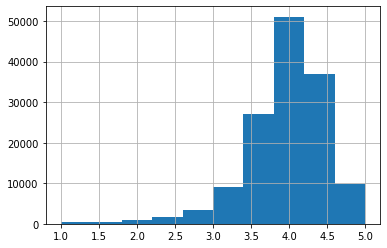

In [227]:
review_df['overall_rating'].hist()

Number of reviews by top reviewers

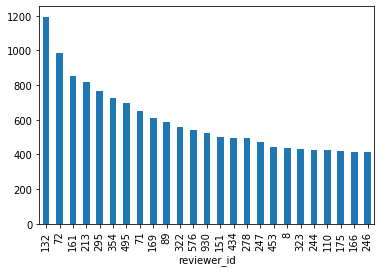

In [322]:
review_df.groupby('reviewer_id')['userid'].count().nlargest(25).plot.bar()

Would show beers with most reviews, but the most reviews a drink can have is 25 due to limitations in scraping.

All of the styles of beers seem to sit around the same median rating

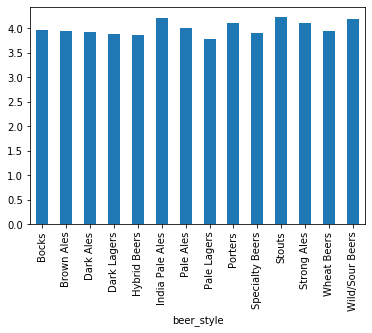

In [323]:
review_df.groupby('beer_style')['overall_rating'].median().plot.bar()

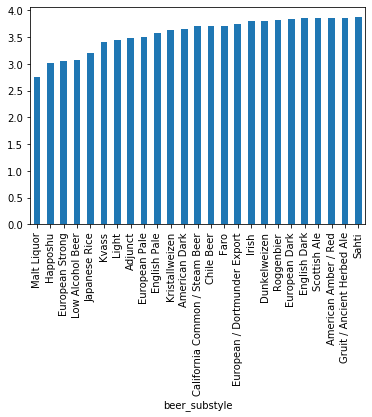

In [330]:
review_df.groupby('beer_substyle')['overall_rating'].median().nsmallest(25).plot.bar()